In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy
import os
import cv2
import pandas as pd
import h5py
import keras
from keras.models import load_model
from keras.utils.np_utils import probas_to_classes
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

os.chdir('/Users/ejlq/Documents/dingchao/ComputerVision')

In [2]:
def openImg(file = 'cropps/roi2017-05-04 12:18:48.695093.png'):
    img = Image.open(file)    
    return img

def resize(img,height = 224,width = 224):
    return img.resize((height,width))
    
def im2Array(img):
    try:
        arr = numpy.array(img.getdata(),numpy.uint8).reshape(img.size[1], img.size[0], 3)
    except:
        grayscaled_arr = numpy.array(img.getdata(),numpy.uint8).reshape(img.size[1], img.size[0])
        arr = cv2.cvtColor(grayscaled_arr, cv2.COLOR_GRAY2RGB)
    #print (arr.shape)
    return arr

def showArray(array):
    plt.imshow(array)

    
def loadImg2Array(file ='cropps/roi2017-05-04 12:18:48.695093.png'):
    #print (file)
    
    img = openImg(file)
    resized_img = resize(img)
    arr = im2Array(resized_img)
    return arr

"""
return array in shape(num_img,img_height,img_width,channel)

"""
def loadBatch2Array(directory = 'cropps/'):
    arrays = [loadImg2Array(directory+name) for name in os.listdir(directory)[1:]]
    np_array = np.array(arrays, dtype=np.float64)
    np_array -= np.mean(np_array,axis = 0)
    np_array /= np.std(np_array,axis = 0)
    return np_array

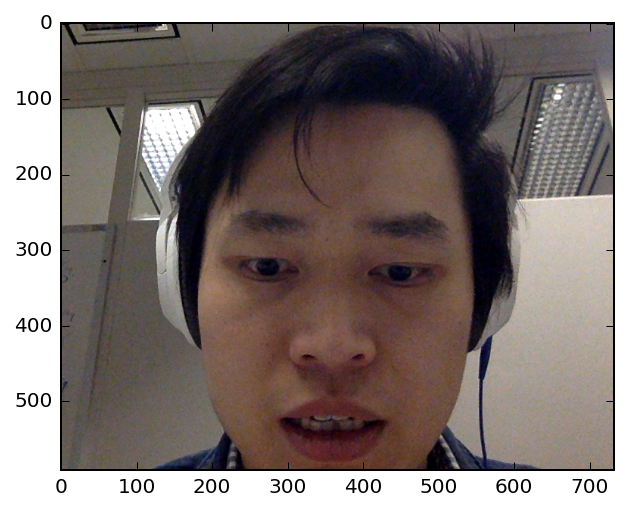

In [3]:
img = openImg()
plt.imshow(img)
arr = im2Array(img)
plt.imshow(arr)

In [4]:
np_array = loadBatch2Array()

In [36]:
modelPath = 'saved_model_20170504.h5'

def loadVGG(model = modelPath):
	model = load_model(model)
	return model
	

def predict_vgg(model,x_test):
    y_proba = model.predict(x=np.array(x_test))
    y_classes = probas_to_classes(y_proba)
    counter = collections.Counter(y_classes)
    most_common = counter.most_common(1)[0][0]
    if most_common  == 1:
    	gender = 'male'
    elif most_common  == 0:
    	gender = 'female'
    return gender

model = loadVGG()
ys = predict_vgg(model,np_array)

In [37]:
ys

'male'

In [8]:
import keras

path= 'cropps/roi2017-05-04 12:18:48.695093.png'
from keras.preprocessing import image
img = image.load_img(path, target_size=(224, 224))

type(img)

arr = im2Array(img)

type(arr)

img_pp = image.img_to_array(img)

type(img_pp)


def preprocess_image(path):

    img = image.load_img(path, target_size=(224, 224))
    img_pp = image.img_to_array(img)
    return img_pp

path2 = 'img_trial_valid/nm0000100_rm1018346496_1955-1-6_2011.jpg'

img_pp1 = preprocess_image(path)
img_pp2 = preprocess_image(path2)

img_arry =[]
img_arry.append(img_pp1)
img_arry.append(img_pp2)

type(img_arry)

img_arry -= np.mean(img_arry,axis = 0)

img_arry /= np.std(img_arry,axis = 0)

Using TensorFlow backend.
